In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import and setup training dataset
TRAINING_DATASET_PATH = "./Fashion_datasets/myntradataset/"
training_data = pd.read_csv(TRAINING_DATASET_PATH + "styles.csv", error_bad_lines=False)
training_data['image'] = training_data.apply(lambda row: str(row['id']) + ".jpg", axis=1)
training_data = training_data.sample(frac=1).reset_index(drop=True)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [3]:
#import and setup test dataset
TEST_DATASET_PATH = "./Fashion_datasets/"
test_data = pd.read_csv(TEST_DATASET_PATH + "styles.csv", nrows=128, error_bad_lines=False)
test_data['image'] = test_data.apply(lambda row: str(row['id']) + ".jpg", axis=1)
test_data = test_data.sample(frac=1).reset_index(drop=True)


In [4]:
#create additional images for training, while splitting dataset into two datasets for training and validation data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

#process training dataset images
training_generator = train_datagen.flow_from_dataframe(
    dataframe=training_data,
    directory=TRAINING_DATASET_PATH + "images",
    x_col="image",
    y_col="masterCategory",
    target_size=(96,96),
    batch_size=32,
    subset="training"
)

#process validation dataset images
valid_generator = train_datagen.flow_from_dataframe(
    dataframe=training_data,
    directory=TRAINING_DATASET_PATH + "images",
    x_col="image",
    y_col="masterCategory",
    target_size=(96,96),
    batch_size=32,
    subset="validation"
)

#process testing dataset images
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    directory=TEST_DATASET_PATH + "images",
    x_col="image",
    y_col="masterCategory",
    target_size=(96,96),
    batch_size=32
)

#create classes (categories to be sorted into)
classes = len(training_generator.class_indices)

D:\Anaconda\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:273: UserWarning: Found 5 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 35536 validated image filenames belonging to 7 classes.
Found 8883 validated image filenames belonging to 7 classes.
Found 128 validated image filenames belonging to 4 classes.


In [5]:
AlexNet = keras.Sequential(name='AlexNet-5')

AlexNet.add(layers.Conv2D(96, kernel_size=(11,11), strides = 4, padding='valid', activation='relu',input_shape=(96,96,3),name='C1'))
# AlexNet.add(layers.BatchNormalization(name='B2'))
AlexNet.add(layers.MaxPool2D(pool_size=(3,3), strides=2, name='S3'))
AlexNet.add(layers.Conv2D(256, kernel_size=(5,5), padding='same', activation='relu', name='C4'))
# AlexNet.add(layers.BatchNormalization(name='B5'))
AlexNet.add(layers.MaxPool2D(pool_size=(3,3), strides=2, name='S6'))
AlexNet.add(layers.Conv2D(384, kernel_size=(3,3), padding='same', activation='relu', name='C7'))
# AlexNet.add(layers.BatchNormalization(name='B8'))
AlexNet.add(layers.Conv2D(384, kernel_size=(3,3), padding='same', activation='relu', name='C9'))
# AlexNet.add(layers.BatchNormalization(name='B10'))
AlexNet.add(layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu', name='C11'))
# AlexNet.add(layers.BatchNormalization(name='B12'))
AlexNet.add(layers.MaxPool2D(pool_size=(2,2), strides=2, name='S13'))
AlexNet.add(layers.Flatten(name='S13_F14_Connection'))

# AlexNet.add(layers.Dense(4096, activation='relu', name='F14'))
# AlexNet.add(layers.Dropout(0.5, name='D15'))
# AlexNet.add(layers.Dense(4096, activation='relu', name='F16'))
# AlexNet.add(layers.Dropout(0.5, name='D17'))
# AlexNet.add(layers.Dense(1000, activation='relu', name='F18'))

AlexNet.add(layers.Dense(512, activation='relu', name='F14'))
AlexNet.add(layers.Dropout(0.5, name='D15'))
AlexNet.add(layers.Dense(512, activation='relu', name='F16'))
AlexNet.add(layers.Dropout(0.5, name='D17'))
AlexNet.add(layers.Dense(128, activation='relu', name='F18'))

AlexNet.add(layers.Dense(7, activation='softmax'))

AlexNet.summary()

Model: "AlexNet-5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 22, 22, 96)        34944     
_________________________________________________________________
S3 (MaxPooling2D)            (None, 10, 10, 96)        0         
_________________________________________________________________
C4 (Conv2D)                  (None, 10, 10, 256)       614656    
_________________________________________________________________
S6 (MaxPooling2D)            (None, 4, 4, 256)         0         
_________________________________________________________________
C7 (Conv2D)                  (None, 4, 4, 384)         885120    
_________________________________________________________________
C9 (Conv2D)                  (None, 4, 4, 384)         1327488   
_________________________________________________________________
C11 (Conv2D)                 (None, 4, 4, 256)         88

In [6]:
# Train the model
AlexNet.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy']
             )

history = AlexNet.fit_generator(
    generator=training_generator,
    steps_per_epoch=training_generator.n/training_generator.batch_size,

    validation_data=valid_generator,
    validation_steps=valid_generator.n/valid_generator.batch_size,

    epochs=20,
    verbose=1
)


Epoch 1/20
1111/1110 [==============================] - 252s 227ms/step - loss: 0.5232 - accuracy: 0.8071 - val_loss: 0.2629 - val_accuracy: 0.9146
Epoch 2/20
1111/1110 [==============================] - 233s 210ms/step - loss: 0.2674 - accuracy: 0.9172 - val_loss: 0.2116 - val_accuracy: 0.9298
Epoch 3/20
1111/1110 [==============================] - 217s 196ms/step - loss: 0.2305 - accuracy: 0.9286 - val_loss: 0.1816 - val_accuracy: 0.9437
Epoch 4/20
1111/1110 [==============================] - 225s 202ms/step - loss: 0.2140 - accuracy: 0.9360 - val_loss: 0.2132 - val_accuracy: 0.9355
Epoch 5/20
1111/1110 [==============================] - 274s 246ms/step - loss: 0.1988 - accuracy: 0.9399 - val_loss: 0.1821 - val_accuracy: 0.9445
Epoch 6/20
1111/1110 [==============================] - 221s 199ms/step - loss: 0.1933 - accuracy: 0.9430 - val_loss: 0.1612 - val_accuracy: 0.9517
Epoch 7/20
1111/1110 [==============================] - 217s 195ms/step - loss: 0.1878 - accuracy: 0.9449 - val_

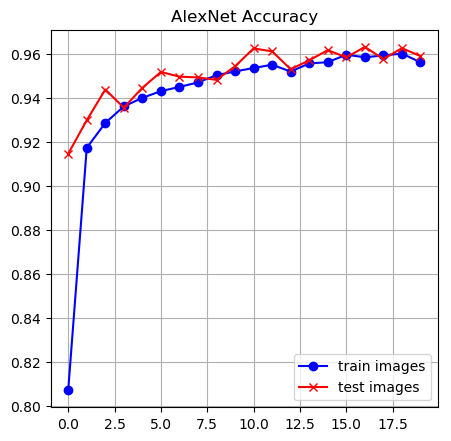

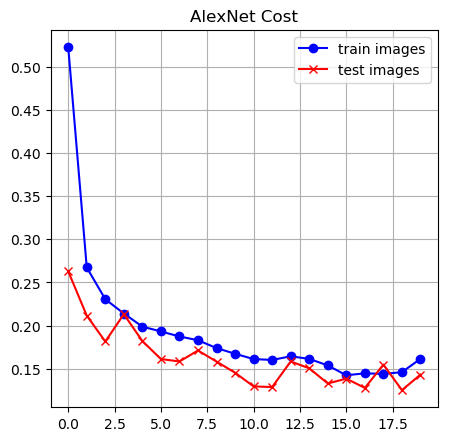

In [7]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss =  history.history['val_loss']
val_acc = history.history['val_accuracy']

epoches = range(len(loss))


plt.figure(num=0,figsize=(5,5),dpi=100)
train_acc,=plt.plot(epoches, acc, 'b-o')
test_acc,=plt.plot(epoches, val_acc, 'r-x')
plt.grid(True)
plt.legend(['train images','test images'])
plt.title('AlexNet Accuracy')
plt.savefig('./AlexNet_Acc')


plt.figure(num=1,figsize=(5,5),dpi=100)
train_loss,=plt.plot(epoches, loss, 'b-o')
test_loss,=plt.plot(epoches, val_loss, 'r-x')
plt.grid(True)
plt.legend(['train images','test images'])
plt.title('AlexNet Cost')
plt.savefig('./AlexNet_Loss')

plt.show()